In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

下面这段代码的预处理没有体现在回归任务中，但其注释是有意义的，对照LSTM.ipynb

In [ ]:
import csv
data = []
with open("/content/drive/MyDrive/covid/data/NY.csv", "r", encoding="utf-8") as f:
    csv_reader = csv.reader(f, delimiter=',')
    headers = next(csv_reader)
    for i in csv_reader:
        data.append(int(i[5]))


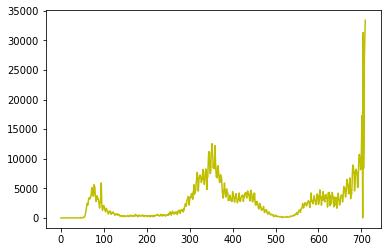

In [ ]:
data_sample = data
x = np.array([i for i in range(len(data_sample))])
y = data_sample

plt.plot(
    x,
    y,
    color="y"
)

f(x) = [-9.09074702]x + 2794.6043283582094
MSE: 1663750.2449899232


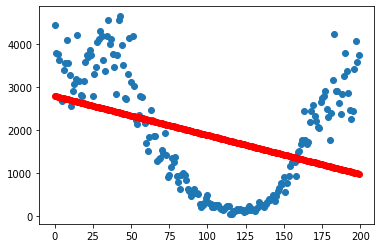

In [ ]:
# 回归分析
#import external libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#The inteval of selected data
data_sample = data[400:600]
x = np.array([i for i in range(200)])
y = data_sample

#secure the dimensions of x
X = x.reshape(-1,1)
#build lin_reg model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

#read the intercept and slope
a = lin_reg.intercept_ 
b = lin_reg.coef_
#to present the lin_reg function

# 转int会丢失精度
# fb = int(a)
# fk = int(b)
fb = a
fk = b

if fb >= 0:
    func = f"f(x) = {fk}x + {fb}"
elif fb < 0:
    func = f"f(x) = {fk}x {fb}"

print(func)

from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y,y_pred))

plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'r')
plt.show()




2833.448552824907 [ 1.04929769e+02 -3.09225281e+00  2.28221542e-02 -4.95281771e-05]
f(x) = 104.92976891174678x^1 + -3.0922528116635344x^2 + 0.02282215416441865x^2 + -4.9528177074709134e-05x^4 + 2833.448552824907
MSE: 189007.94114654994


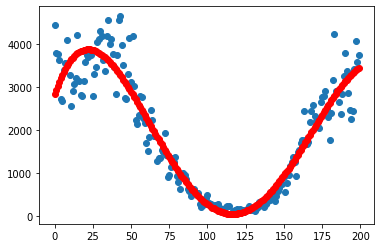

In [ ]:
#Set the degree of the poly func
degree=4
poly = PolynomialFeatures(degree, include_bias=False) # set degree
poly.fit(X)
X2 = poly.transform(X)

# Train
lin_reg = LinearRegression()
lin_reg.fit(X2, y)

y_pred = lin_reg.predict(X2)

print(lin_reg.intercept_, lin_reg.coef_)


#poly func
# func = f"f(x) = {(lin_reg.coef_[0])}x^{degree} + {(lin_reg.coef_[1])}x^{degree-1} + {(lin_reg.coef_[2])}x^{degree -2} + {(lin_reg.coef_[3])}x^{degree-3} + {lin_reg.intercept_}"
# 我记得lin_reg.coef_是针对degree递增排列的，你最好再check一下
func = f"f(x) = {(lin_reg.coef_[0])}x^{degree-3} + {(lin_reg.coef_[1])}x^{degree-2} + {(lin_reg.coef_[2])}x^{degree - 3} + {(lin_reg.coef_[3])}x^{degree} + {lin_reg.intercept_}"


print(func)
print("MSE:", mean_squared_error(y,y_pred))

plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'r')
plt.show()

In [ ]:
# 多项式回归分析 250～400 之间的数据\
#import external libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#The inteval of selected data
data_sample = data[400:600]
x = np.array([i for i in range(200)])
y = data_sample

#secure the dimensions of x
X = x.reshape(-1,1)
#build lin_reg model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

#read the intercept and slope
a = lin_reg.intercept_ 
b = lin_reg.coef_
#to present the lin_reg function
fb = int(a)
fk = int(b)
if fb >= 0:
    func = f"f(x) = {fk}x + {fb}"
elif fb < 0:
    func = f"f(x) = {fk}x {fb}"

#calculate the MSE value
temp0 = 0
for i in range(len(y)):
    temp0 += ((y_pred[i] - y[i]) ** 2)
MSE = temp0 / len(y)
#plot the graph
plt.scatter(x, y, label=f'MSE : {int(MSE)}')
plt.scatter(x, y_pred, color = 'r', label=func)
plt.title('Linear Regression')
plt.legend()
plt.show()

#Set the degree of the poly func
degree=4
poly = PolynomialFeatures(degree) # set degree
poly.fit(X)
X2 = poly.transform(X)

# Train
lin_reg = LinearRegression()
lin_reg.fit(X2, y)

# print(lin_reg.intercept_, lin_reg.coef_)
# print((lin_reg.coef_)*1000)
# print(lin_reg.coef_)

#poly func
func = f"f(x) = {int(lin_reg.coef_[0])}x^{degree} + {int(lin_reg.coef_[1])}x^{degree-1} + {int(lin_reg.coef_[2])}x^{degree -2} + {int(lin_reg.coef_[3])}x^{degree-3}"
print(func)
#calculate MSE
temp = 0
t_result = 0
list0 = []
# for i in range(len(y)):
#     deg_0 = int(lin_reg.coef_[0]) * (i ** degree)
#     deg_1 = int(lin_reg.coef_[1])* (i ** (degree - 1))
#     deg_2 = int(lin_reg.coef_[2])* (i **(degree-2))
#     deg_3 = int(lin_reg.coef_[3])* (i **(degree-3))
#     temp0 = deg_0 + deg_1 + deg_2 + deg_3
#     t_result += (temp0 - y[i]) ** 2
    #temp0 += (int(lin_reg.coef_[0]) * i ** degree) + (int(lin_reg.coef_[1])* i ** (degree - 1)) + (int(lin_reg.coef_[2])*i**(degree-2)) + (int(lin_reg.coef_[3])*i**(degree-3)) 
y_pred = lin_reg.predict(X2)
for i in range(len(y)):
    temp0 += ((y_pred[i] - y[i]) ** 2)
MSE = temp0 / len(y)
MSE = int(MSE)
plt.scatter(x, y, label = f"MSE: {MSE}")
plt.scatter(x, y_pred, color = 'r', label=func)
plt.title('Polynomial Regression')
plt.legend(loc='best')
plt.show()

In [ ]:
temp0 = 0
for i in range(len(y)):
    temp0 += ((y_pred[i] - y[i]) ** 2)
MSE = temp0 / len(y)

In [ ]:
MSE

In [ ]:
int(lin_reg.coef_[1])